In [73]:
import matplotlib.pyplot as plt
import Portfolio
from dateutil import rrule 
import datetime
from datetime import timedelta as td
import time
import math
import numpy as np
import pandas as pd

In [6]:
tickers = ['YHOO','STK','GOOGL','AMZN','EBAY']
weights = [0.2,0.1,0.4,0.15,0.15]
#instantiate positions
positions = []
start_date = datetime.datetime(2010, 1, 1)
for i in range(len(tickers)):
    positions.append(Portfolio.Position(tickers[i],"long",30,start_date,weights[i],"NASDAQ","stock"))
#instantiate portfolio
portfolio = Portfolio.Portfolio(positions)
mu = portfolio.net_expectation
sigma = math.sqrt(portfolio.net_variance)

In [7]:
mu

0.055875472973644209

In [8]:
sigma

1.4162618350646003

0.029539999999997235


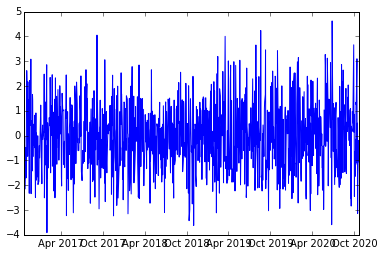

In [96]:
import time
t0 = time.clock()
n_trials = 10
horizon = 48
days, perf = monte_carlo_simulation(mu,sigma,n_trials,horizon)
t1 = time.clock()
print(t1 - t0)
plt.plot(days, perf[0])

In [93]:
#horizon in months
# about 45 seconds for 1 million trials and 4 years
def monte_carlo_simulation(mu,sigma,n_trials,horizon):
    start_date = datetime.date.today()
    end_date = start_date + datetime.timedelta(horizon*365/12)
    trading_days = list(NYSE_tradingdays(start_date,end_date))
    n_days = len(trading_days)
    returns = np.random.normal(mu,sigma,size=(n_trials,n_days))
    return trading_days,np.cumsum(returns,axis=0)

In [56]:
def NYSE_tradingdays(a,b):
    rs = rrule.rruleset()
    rs.rrule(rrule.rrule(rrule.DAILY, dtstart=a, until=b))
    # Exclude weekends and holidays
    rs.exrule(rrule.rrule(rrule.WEEKLY, dtstart=a, byweekday=(rrule.SA,rrule.SU)))
    rs.exrule(NYSE_holidays(a,b))
    return rs 

In [58]:
def NYSE_holidays(a=datetime.date.today(), b=datetime.date.today()+datetime.timedelta(days=365)):
    rs = rrule.rruleset()

    # Include all potential holiday observances
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=31, byweekday=rrule.FR)) # New Years Day  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 1, bymonthday= 1))                     # New Years Day  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 1, bymonthday= 2, byweekday=rrule.MO)) # New Years Day    
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 1, byweekday= rrule.MO(3)))            # Martin Luther King Day   
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 2, byweekday= rrule.MO(3)))            # Washington's Birthday
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, byeaster= -2))                                  # Good Friday
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 5, byweekday= rrule.MO(-1)))           # Memorial Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 7, bymonthday= 3, byweekday=rrule.FR)) # Independence Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 7, bymonthday= 4))                     # Independence Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 7, bymonthday= 5, byweekday=rrule.MO)) # Independence Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 9, byweekday= rrule.MO(1)))            # Labor Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=11, byweekday= rrule.TH(4)))            # Thanksgiving Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=24, byweekday=rrule.FR)) # Christmas  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=25))                     # Christmas  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=26, byweekday=rrule.MO)) # Christmas 
    
    # Exclude potential holidays that fall on weekends
    rs.exrule(rrule.rrule(rrule.WEEKLY, dtstart=a, until=b, byweekday=(rrule.SA,rrule.SU)))

    return rs